In [7]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [8]:
def n(x):
    # the real function to estimate
    return (1.0 - np.exp(-5.0*x)) * 100

In [9]:
n(np.arange(1,10))

array([ 99.3262053 ,  99.99546001,  99.99996941,  99.99999979,
       100.        , 100.        , 100.        , 100.        ,
       100.        ])

In [10]:
def generate_observations(x, noise_std):
    return n(x) + np.random.normal(0,noise_std, size= n(x).shape)

In [11]:
n_obs = 50
bids = np.linspace(0.0, 1.0, 20)
x_obs = np.array([])
y_obs = np.array([])

noise_std = 5.0

for i in range(0, n_obs):
    new_x_obs = np.random.choice(bids, 1)
    new_y_obs = generate_observations(new_x_obs, noise_std)
    
    x_obs = np.append(x_obs, new_x_obs)
    y_obs = np.append(y_obs, new_y_obs)
    
    X = np.atleast_2d(x_obs).T
    Y = y_obs.ravel()

    theta = 1.0
    l = 1.0
    kernel = C(theta, (1e-3, 1e3)) * RBF(l, (1e-3, 1e3))
    gp = GaussianProcessRegressor(kernel=kernel, alpha = noise_std**2, normalize_y=True, n_restarts_optimizer=10)

    gp.fit(X,Y)

    x_pred = np.atleast_2d(bids).T
    y_pred, sigma = gp.predict(x_pred, return_std=True)
    
    plt.figure(i)
    plt.plot(x_pred, n(x_pred), 'r:', label=r'$n(x)$')
    plt.plot(X.ravel(), Y, 'ro', label=u'Observed Clicks')
    plt.plot(x_pred, y_pred, 'b-', label=u'Predicted Clicks')
    plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
             np.concatenate([y_pred - 1.96*sigma, (y_pred + 1.96*sigma)[::-1]]),
             alpha = .5, fc='b', ec='None', label = '95% conf interval')
    plt.xlabel('$x$')
    plt.ylabel('$n(x)$')
    plt.legend(loc='lower right')
    plt.show()
    

/Users/irfanmasudi/opt/anaconda3/envs/DIA/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:201: RuntimeWarning: invalid value encountered in true_divide
  self._y_train_mean = np.mean(y, axis=0)


ValueError: array must not contain infs or NaNs

In [62]:
gp?

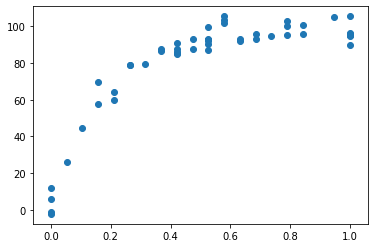

In [23]:
plt.scatter(x_obs, y_obs)

array([[0.15789474],
       [0.68421053],
       [0.52631579],
       [1.        ],
       [0.73684211],
       [0.57894737],
       [0.94736842],
       [1.        ],
       [0.42105263],
       [0.        ],
       [0.52631579],
       [0.26315789],
       [0.84210526],
       [0.36842105],
       [0.42105263],
       [0.21052632],
       [0.42105263],
       [0.47368421],
       [0.15789474],
       [0.05263158],
       [0.        ],
       [0.47368421],
       [0.52631579],
       [0.78947368],
       [1.        ],
       [1.        ],
       [0.42105263],
       [0.57894737],
       [0.        ],
       [0.57894737],
       [0.78947368],
       [0.21052632],
       [1.        ],
       [1.        ],
       [0.52631579],
       [0.52631579],
       [0.31578947],
       [0.36842105],
       [0.52631579],
       [1.        ],
       [0.63157895],
       [0.10526316],
       [0.        ],
       [0.63157895],
       [0.78947368],
       [0.52631579],
       [0.42105263],
       [0.684